In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import env

In [5]:
url = env.get_database('mall_customers')
query = '''
select *
from customers;'''

In [7]:
df = pd.read_sql(query, url)

In [8]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

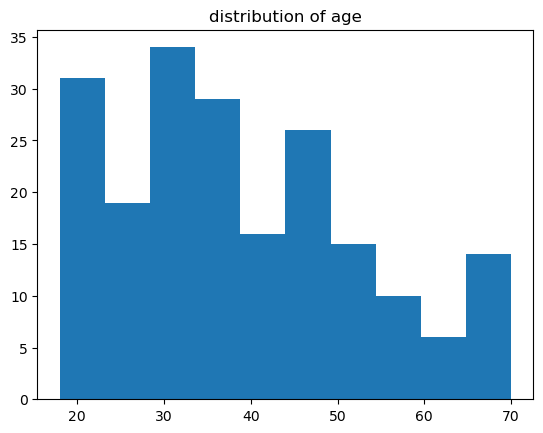

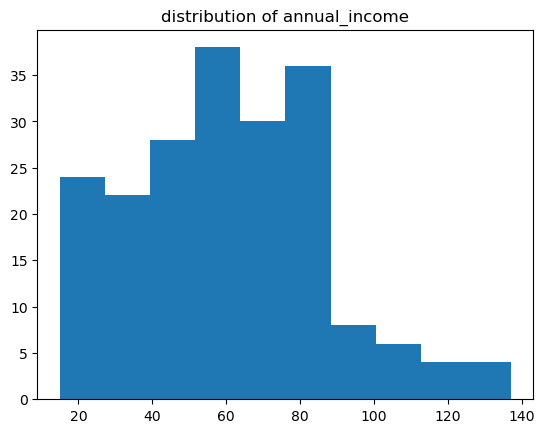

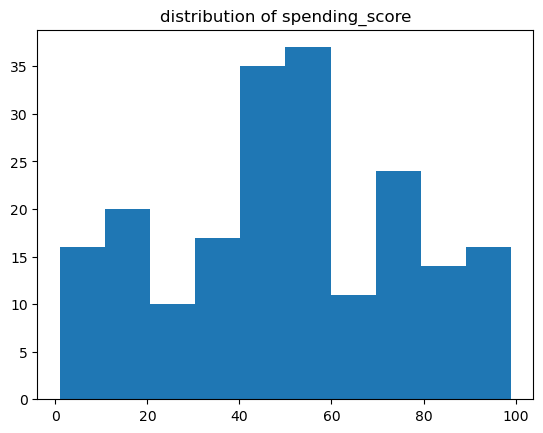

In [9]:
num_cols = ['age', 'annual_income', 'spending_score']

for col in num_cols:
    
    plt.hist(df[col])
    plt.title(f'distribution of {col}')
    plt.show()

## Detect outliers using IQR

In [12]:
q1, q3 = df.spending_score.quantile([0.25, 0.75])
q1 ,q3

(34.75, 73.0)

In [13]:
ss_iqr = q3 - q1
ss_iqr

38.25

In [16]:
k = 1.5

ss_upper = q3 + k * ss_iqr
ss_lower = q1 - k * ss_iqr

ss_lower, ss_upper


(-22.625, 130.375)

In [19]:
np.where(df.spending_score > ss_upper, 1, 0) # 1, 0 are the values for if True, if False

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [20]:
def upper_outlier_detector(dataframe, column, k = 1.5):
    q1, q3 = dataframe[column].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + k * iqr
    
    return np.where(dataframe[column] > upper_bound, 1, 0)

In [21]:
my_list = ['age', 'annual_income']

for col in my_list:
    
    df[f'{col}_upper_outliers'] = upper_outlier_detector(df, col)
    
df.head()

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0


In [24]:
df[['age_upper_outliers', 'annual_income_upper_outliers']].sum()

age_upper_outliers              0
annual_income_upper_outliers    2
dtype: int64

In [25]:
df[df['annual_income_upper_outliers'] == 1]

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
198,199,Male,32,137,18,0,1
199,200,Male,30,137,83,0,1


In [26]:
df['annual_income'].mean()

60.56

# Start of Exercises

In [32]:
url = env.get_database('zillow')

query = '''
select *, airconditioningdesc, architecturalstyledesc, buildingclassdesc, heatingorsystemdesc, logerror, transactiondate, propertylandusedesc, storydesc, typeconstructiondesc
from properties_2017
left join airconditioningtype using(airconditioningtypeid)
left join heatingorsystemtype using(heatingorsystemtypeid)
left join architecturalstyletype using(architecturalstyletypeid)
left join buildingclasstype using(buildingclasstypeid)
join predictions_2017 using(parcelid)
left join propertylandusetype using(propertylandusetypeid)
left join storytype using(storytypeid)
left join typeconstructiontype using(typeconstructiontypeid)
where propertylandusedesc = 'Single Family Residential';'''

In [33]:
zillow = pd.read_sql(query, url)



In [34]:
zillow

,typeconstructiontypeid,storytypeid,propertylandusetypeid,parcelid,buildingclasstypeid,architecturalstyletypeid,heatingorsystemtypeid,airconditioningtypeid,id,basementsqft,...,typeconstructiondesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,14297519,None,NaN,NaN,NaN,1727539,NaN,...,None,None,None,None,None,0.025595,2017-01-01,Single Family Residential,None,None
1,NaN,NaN,261.0,17052889,None,NaN,NaN,NaN,1387261,NaN,...,None,None,None,None,None,0.055619,2017-01-01,Single Family Residential,None,None
2,NaN,NaN,261.0,14186244,None,NaN,NaN,NaN,11677,NaN,...,None,None,None,None,None,0.005383,2017-01-01,Single Family Residential,None,None
3,NaN,NaN,261.0,12177905,None,NaN,2.0,NaN,2288172,NaN,...,None,None,None,None,Central,-0.103410,2017-01-01,Single Family Residential,None,None
4,NaN,NaN,261.0,12095076,None,NaN,2.0,1.0,781532,NaN,...,None,Central,None,None,Central,-0.001011,2017-01-01,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,NaN,NaN,261.0,11000655,None,NaN,2.0,NaN,673515,NaN,...,None,None,None,None,Central,0.020615,2017-09-20,Single Family Residential,None,None
52438,NaN,NaN,261.0,17239384,None,NaN,NaN,NaN,2968375,NaN,...,None,None,None,None,None,0.013209,2017-09-21,Single Family Residential,None,None
52439,NaN,NaN,261.0,12773139,None,NaN,2.0,1.0,1843709,NaN,...,None,Central,None,None,Central,0.037129,2017-09-21,Single Family Residential,None,None
52440,NaN,NaN,261.0,12826780,None,NaN,2.0,NaN,1187175,NaN,...,None,None,None,None,Central,0.007204,2017-09-25,Single Family Residential,None,None


In [35]:
zillow.iloc[:,[4]]

,buildingclasstypeid
0,None
1,None
2,None
3,None
4,None
...,...
52437,None
52438,None
52439,None
52440,None


In [41]:
zillow.iloc[:, 0].isna().sum()

52366

In [56]:
loop = list(range(0,78))

In [57]:
adf = []
for i in loop:
    x = zillow.iloc[:, i].isna().sum()
    adf.append(x)
    

In [48]:
zillow.iloc[:, 5].isna().sum()

52372

In [53]:
def tie(df):
    hel = []
    numbs = list(range(0, 79))
    for i in numbs:
        x = df.iloc[:, 5].isna().sum()
        hel.append(x)
    return hel
    

In [54]:
tie(zillow)

[52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372,
 52372]

In [52]:
helllo

[5]